In [ ]:
import Analytics

import importlib
importlib.reload(Analytics)

from ipywidgets import widgets
output = widgets.Output()
display(output)

df, players_info = Analytics.seasonEvents(output)
df

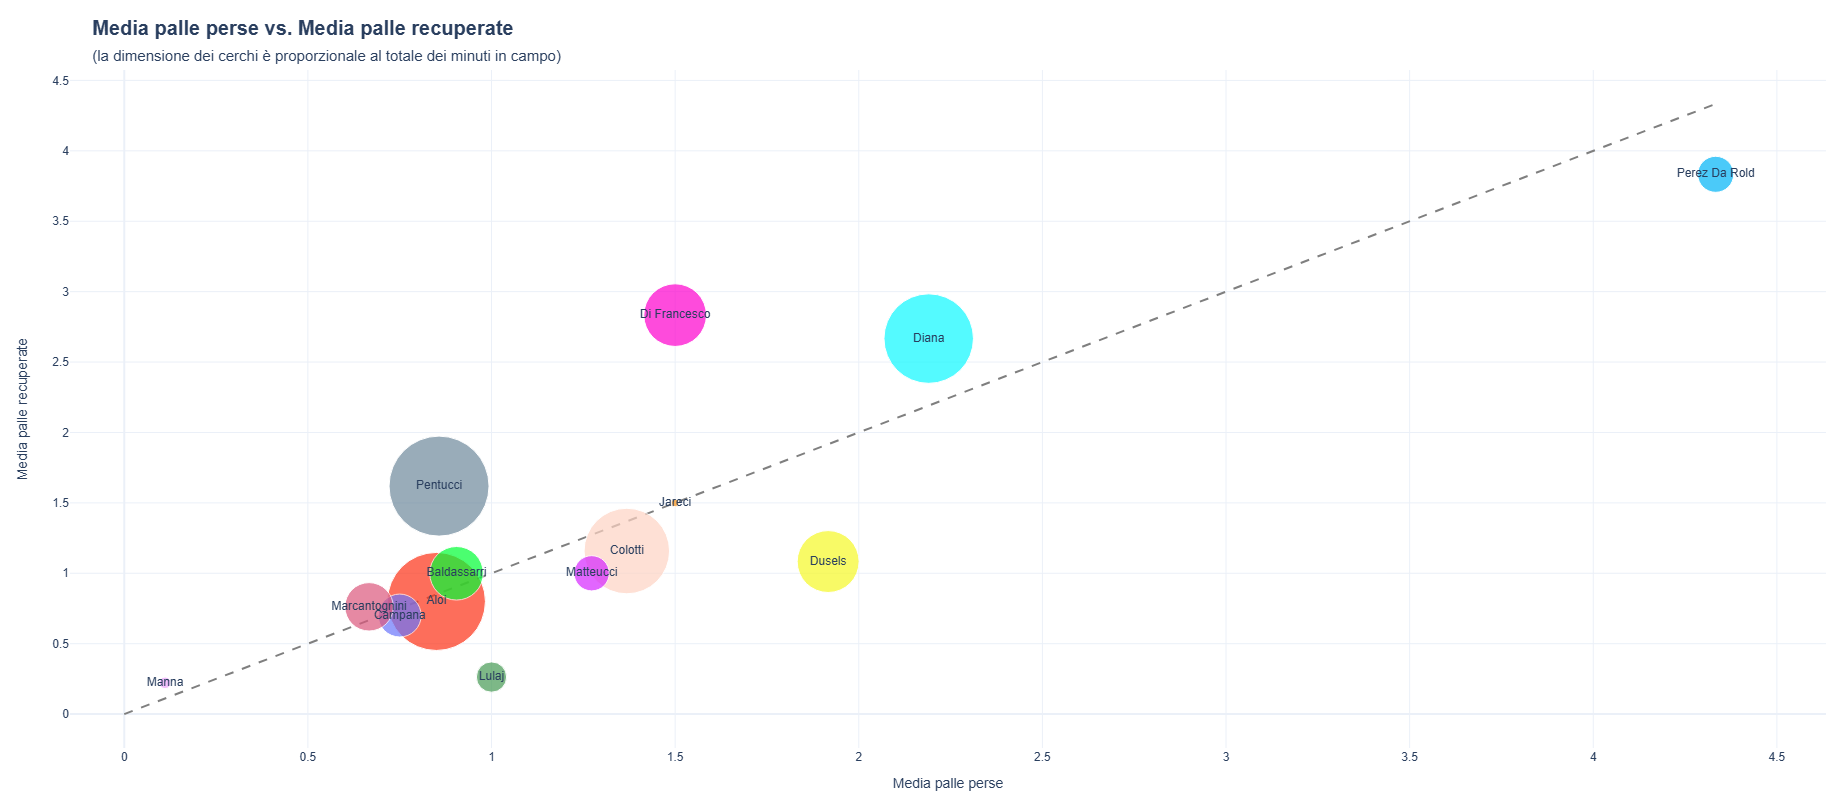

In [17]:
import Analytics

import importlib
importlib.reload(Analytics)

# Palle Perse vs Palle recuperate
staty = 'PRec'
descry = 'Media palle recuperate'

statx = 'PPer'
descrx = 'Media palle perse'

dfx = df[df['event_name']==statx]
dfy = df[df['event_name']==staty]

gx = dfx.groupby('player').count()['event']
players = list(gx.index)
x = list(gx)
y = list(dfy.groupby('player').count()['event'])

fig = Analytics.scatterChart(players, x, y, players_info, descrx, descry, size_on_time=True, show_bisector=True)
fig

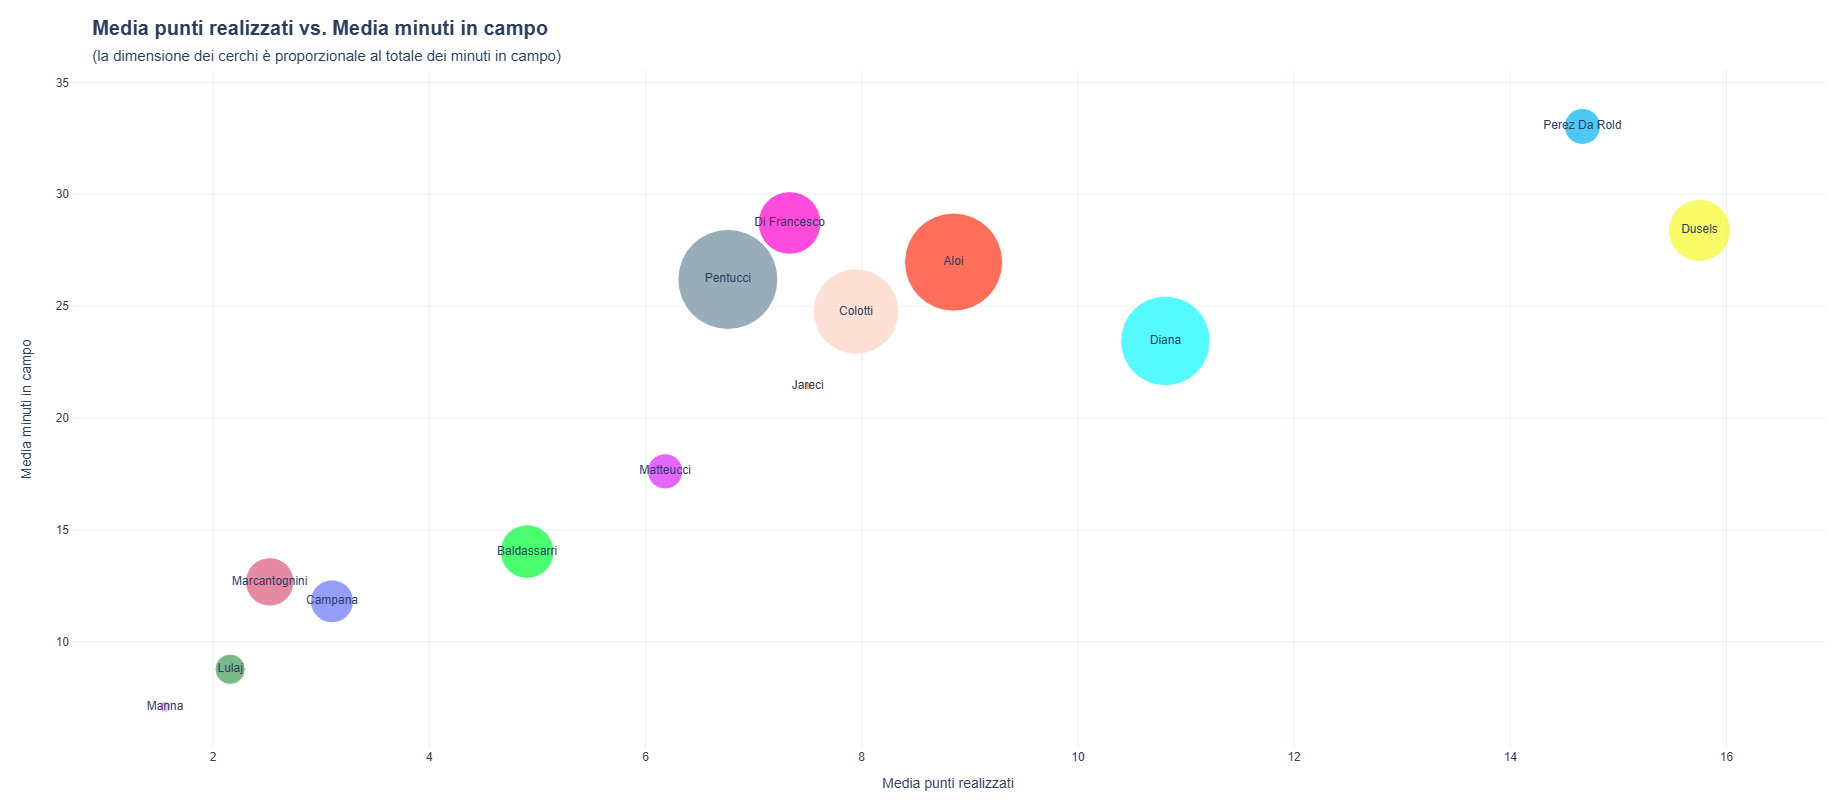

In [18]:
# Punti realizzati per minuti in campo
import Stats

descrx = 'Media punti realizzati'
players = sorted(df['player'].unique())
x = [Stats.points(df,p) for p in players]

descry = 'Media minuti in campo'
y = [players_info[x]['time_on_field']/60.0 for x in players]

fig = Analytics.scatterChart(players, x, y, players_info, descrx, descry, size_on_time=True, show_bisector=False)
fig

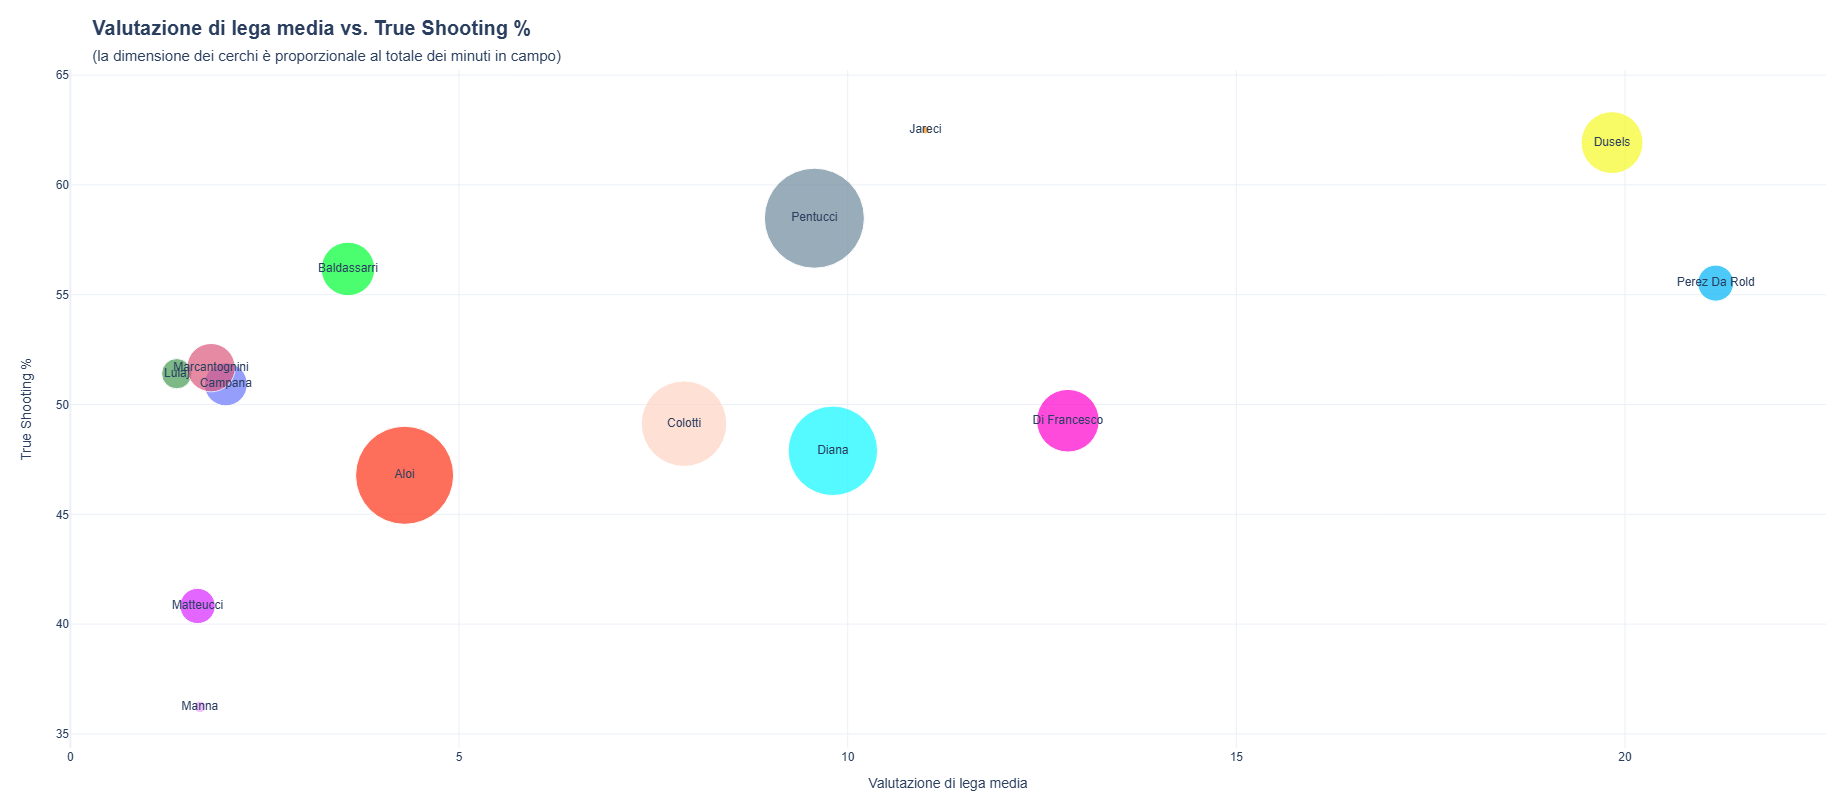

In [19]:
# Valutazione Lega vs. True shooting
import Stats

descrx = 'Valutazione di lega media'
players = sorted(df['player'].unique())
x = [Stats.value(df,p)/players_info[p]['games'] for p in players]

descry = 'True Shooting %'
y = [Stats.trueshooting(df,p) for p in players]

fig = Analytics.scatterChart(players, x, y, players_info, descrx, descry, size_on_time=True, show_bisector=False, do_average=False)
fig

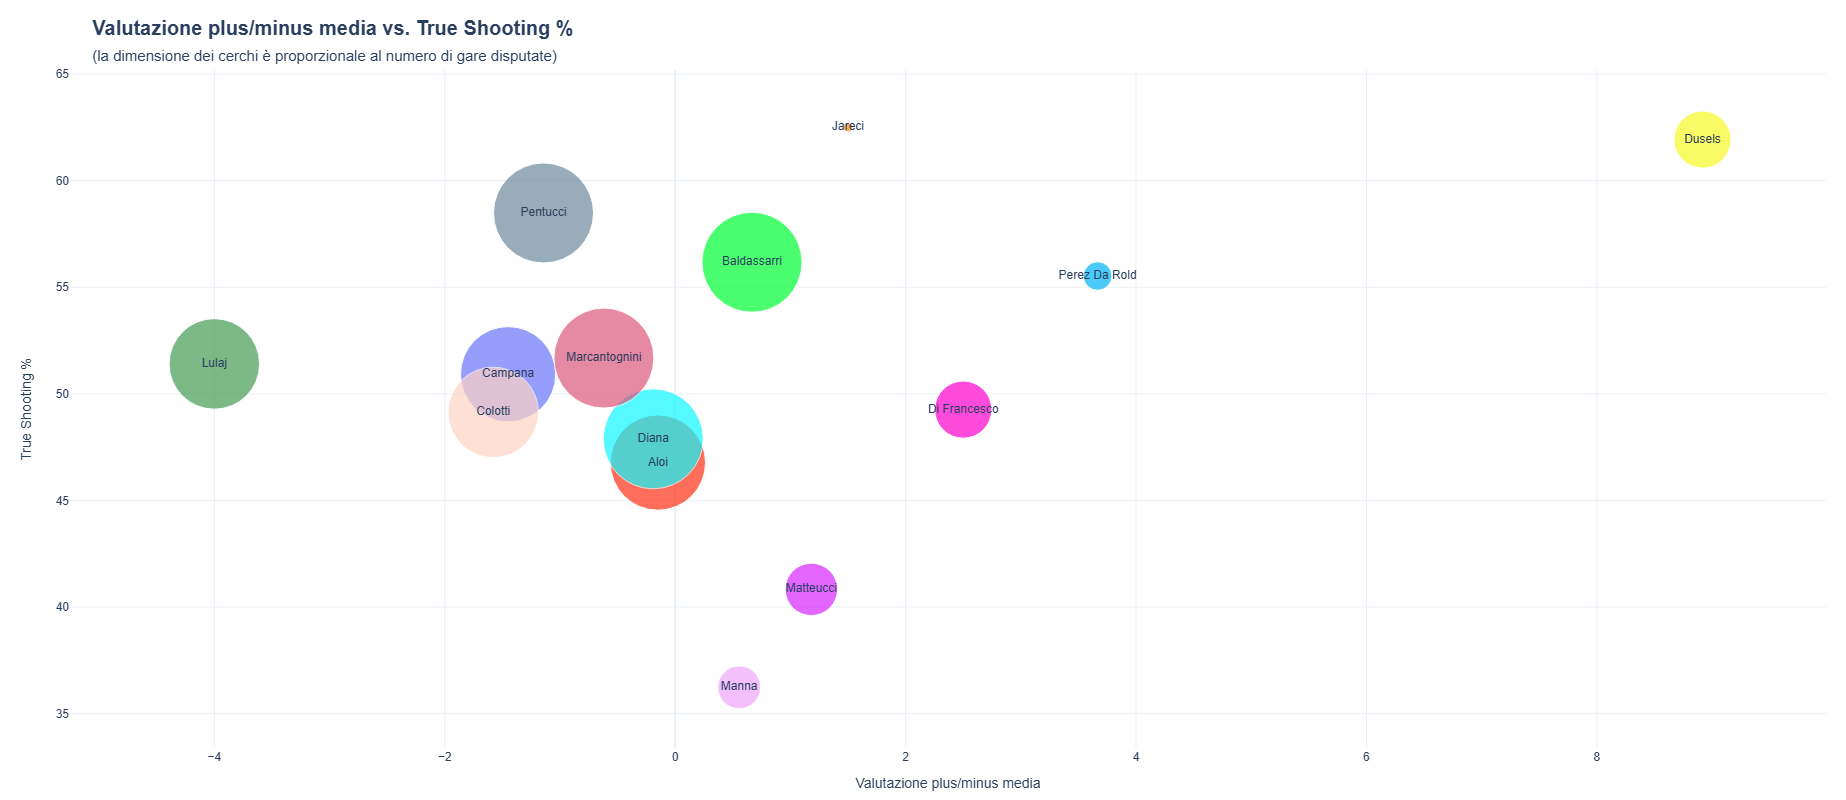

In [20]:
# Valutazione +/- vs. True shooting
import Stats

descrx = 'Valutazione plus/minus media'
players = sorted(df['player'].unique())
x = [players_info[p]['plusminus']/players_info[p]['games'] for p in players]

descry = 'True Shooting %'
y = [Stats.trueshooting(df,p) for p in players]

fig = Analytics.scatterChart(players, x, y, players_info, descrx, descry, size_on_time=False, show_bisector=False, do_average=False)
fig

In [ ]:
players_info

In [ ]:
# Salvataggio in HTML!!!
fig.write_html("web/chart.html")

In [ ]:
# Display throw map of all the season
from ipywidgets import widgets, HTML, Layout
import ipyvuetify as v
import ThrowMap
import ScoreBoard

#from vois import cssUtils
#cssUtils.allSettings()

command = '''
<style>.jp-OutputPrompt {
    flex: 0 0 0 !important;
    display: inline !important;
    min-width: 0 !important;
    padding: 0 !important;
}
</style>'''

display(HTML(command))

        
import importlib
importlib.reload(ScoreBoard)
importlib.reload(ThrowMap)

output = widgets.Output()
display(output)

sb = ScoreBoard.ScoreBoard('./data/Urbania.team', scale=0.5, output=output)
m = ThrowMap.ThrowMap(board=sb, scale=1.0, field_left=True, small_points=True, output=output)
m.updateThrows(df, player_name=None, background=True, display_full_stats=False)
display(m)